## 03_no_slip
* Experiment 04_320x456x100
* Max depth is 4500 m 
* 24 hrs
* Forced with local 2 hr half-gaussian wind event alongshore, upwelling favourable
* winter stratification
* Velocities at boundaries set to zero
* With sponge (12 pts, inner=86400 s, bound=3600 s, linear sponge, salt and theta sponge false)
* Output every 10 min (from diagnostics, 10 min averages), only outputing 75 levels
* Bathymetry is not smoothed
* No slip sides and bottom = True, bottom drag coef = 0.

In [1]:
from netCDF4 import Dataset
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
%matplotlib inline
import numpy as np
from scipy import signal
import sys
sys.path.append('/Users/Karina/Research/SWOT-Scripps/notebooks_SVB/')
import svb_tools as svb
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
bathy_file1 = '/Volumes/KYUUBI/SVB/04_320x456x100/03_no_slip/gridGlob.nc'
state_file1 = '/Volumes/KYUUBI/SVB/04_320x456x100/03_no_slip/dynVarsGlob.nc'
eta_file1 = '/Volumes/KYUUBI/SVB/04_320x456x100/03_no_slip/etaGlob.nc'

### Load bathymetry variables

In [3]:
with Dataset(bathy_file1, 'r') as nbl:
    lat = nbl.variables['Y'][:]
    lon = nbl.variables['X'][:]
    Z = nbl.variables['Z'][:]
    Zl = nbl.variables['Zl'][:]
    depth = nbl.variables['Depth'][:]
    # centers mask
    hFacC = nbl.variables['HFacC'][:]
    hfac = np.ma.masked_values(hFacC, 0)
    mask = np.ma.getmask(hfac)
    # U mask
    hFacW = nbl.variables['HFacW'][:]
    hfacW = np.ma.masked_values(hFacW, 0)
    maskU = np.ma.getmask(hfacW)
    # V mask
    hFacS = nbl.variables['HFacS'][:]
    hfacS = np.ma.masked_values(hFacS, 0)
    maskV = np.ma.getmask(hfacS)
    # masked depth
    dep_masked = np.ma.masked_values(depth,0)
    mask_dep = np.ma.getmask(dep_masked)
    
with Dataset(state_file1, 'r') as nbl:
    Zind = (nbl.variables['diag_levels'][:]).astype(int)

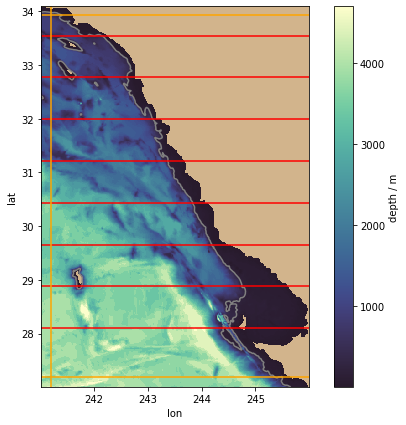

In [4]:
fig, ax = plt.subplots(1,1,figsize=(9,7))
ax.set_facecolor('tan')
pc = ax.pcolormesh(lon,lat,np.ma.masked_array(depth, mask=mask_dep), cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc)
cn2 = ax.contour(lon,lat,depth, colors='0.5', levels=[250])

lon_ind = 255
lat_ind1 = 70
lat_ind2 = 120

# ssh transects
ax.plot(lon[:],lat[lat_ind1]*np.ones_like(lon),'r-')
ax.plot(lon[:],lat[lat_ind2]*np.ones_like(lon),'r-')
ax.plot(lon[:],lat[lat_ind2+50]*np.ones_like(lon),'r-')
ax.plot(lon[:],lat[lat_ind2+100]*np.ones_like(lon),'r-')
ax.plot(lon[:],lat[lat_ind2+150]*np.ones_like(lon),'r-')
ax.plot(lon[:],lat[lat_ind2+200]*np.ones_like(lon),'r-')
ax.plot(lon[:],lat[lat_ind2+250]*np.ones_like(lon),'r-')
ax.plot(lon[:],lat[lat_ind2+300]*np.ones_like(lon),'r-')

# sponge widths
ax.plot(lon[12]*np.ones_like(lat),lat[:],'-', color='orange')
ax.plot(lon[:],lat[12]*np.ones_like(lon),'-', color='orange')
ax.plot(lon[:],lat[-12]*np.ones_like(lon),'-', color='orange')

cb.set_label('depth / m')
ax.set_xlabel('lon')
ax.set_ylabel('lat')

ax.set_aspect(1)

### Surface fields

(<matplotlib.axes._subplots.AxesSubplot at 0x1a4a2d7890>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a4c25fb10>)

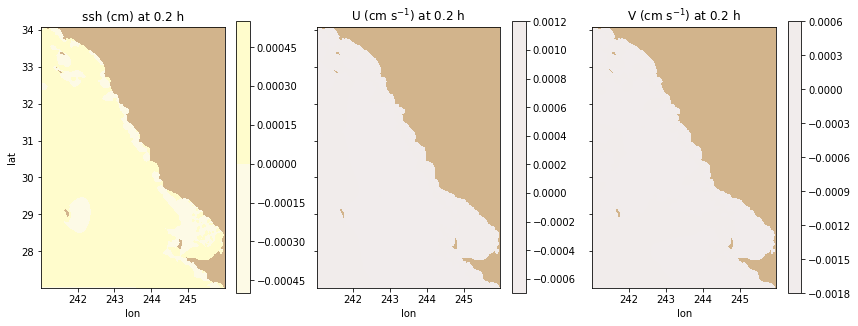

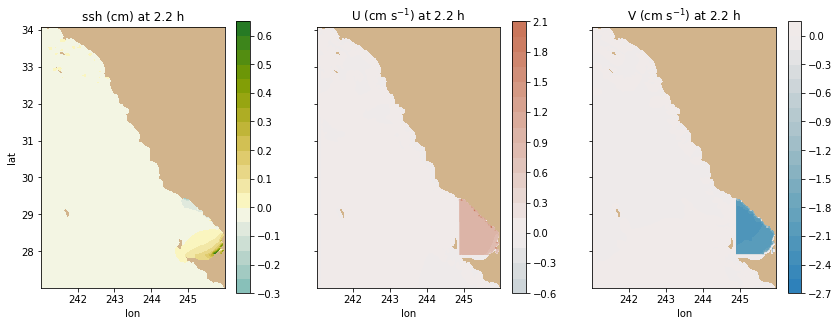

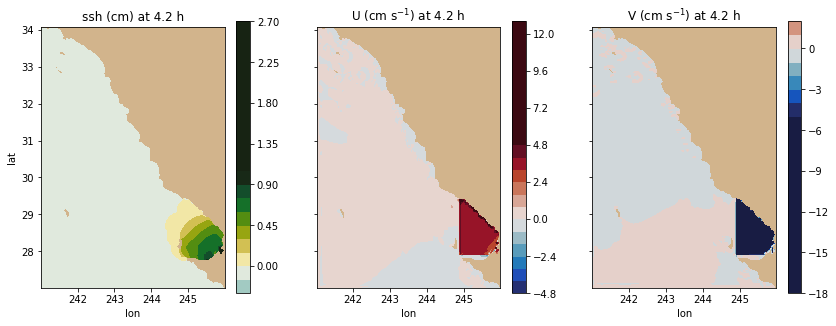

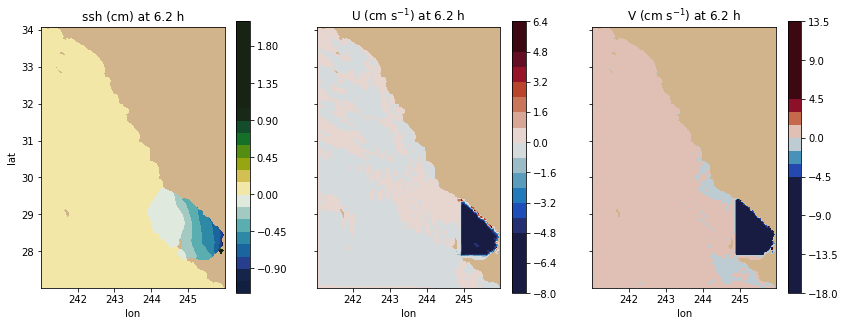

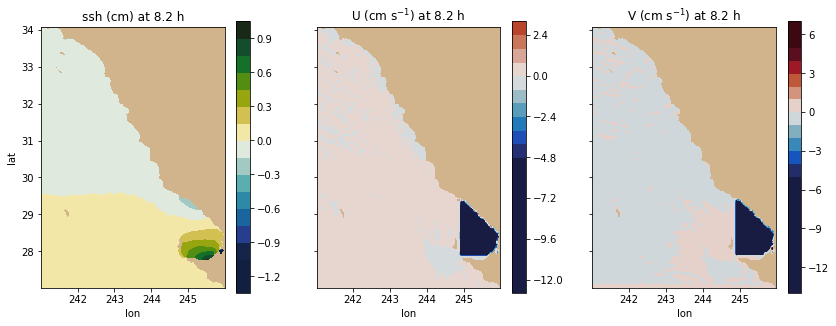

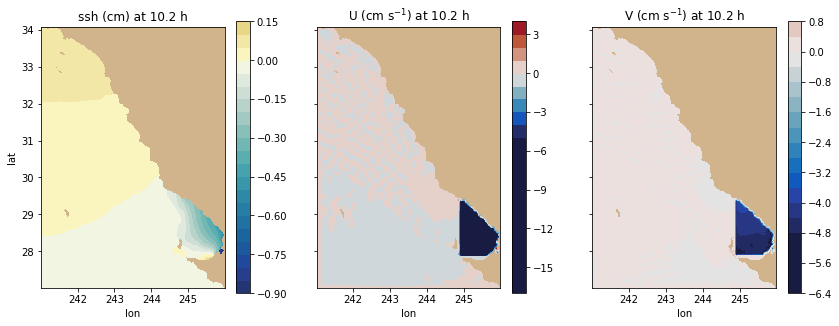

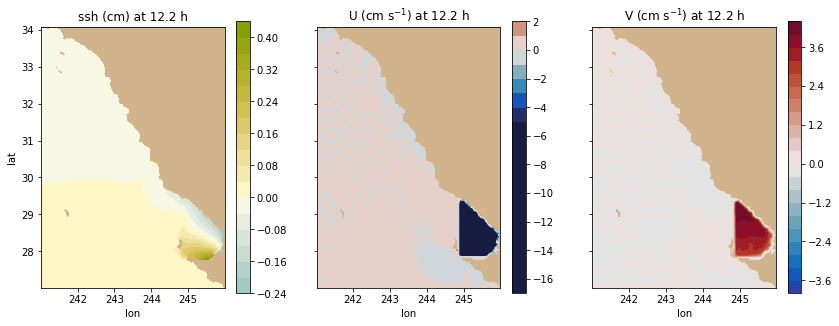

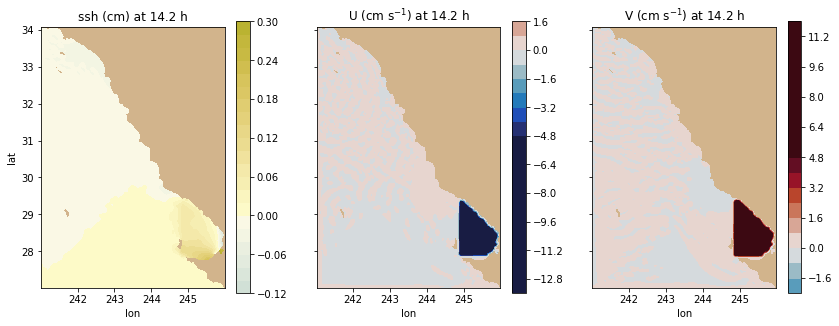

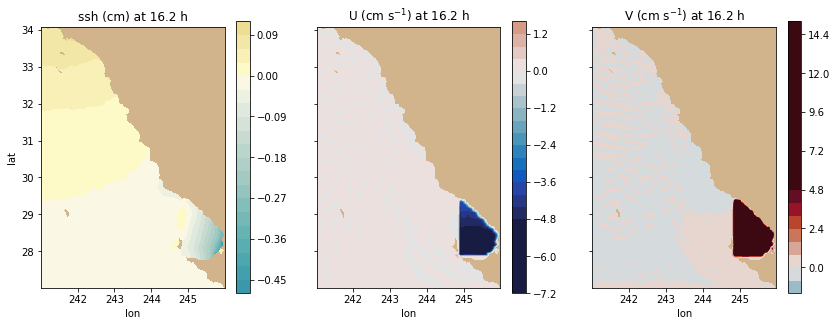

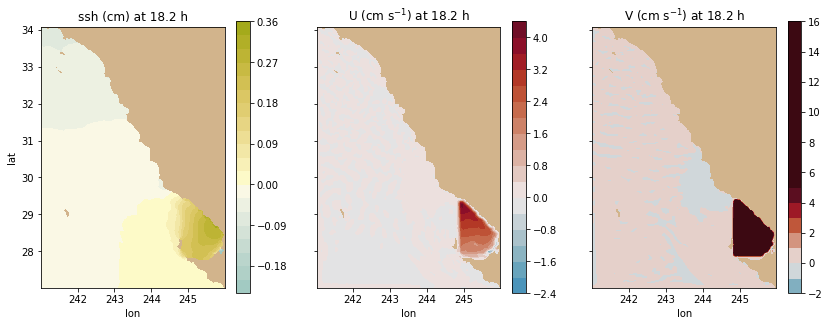

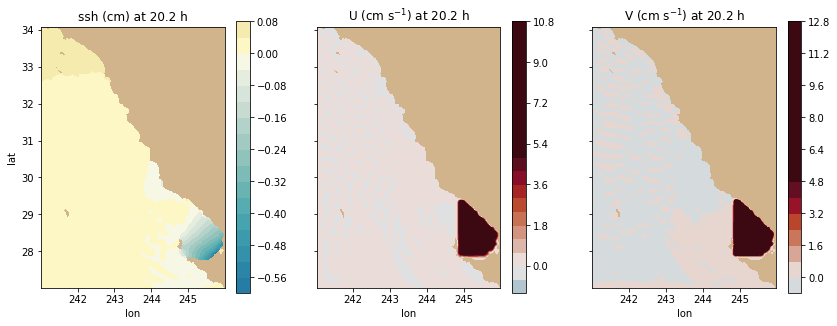

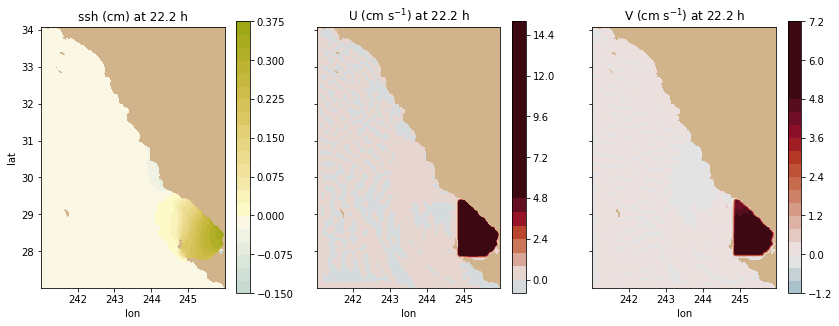

In [5]:
zz=0
state_file= state_file1
time_indexes = range(0,144,12)
svb.plot_level_vars_diag(state_file1, eta_file1, lon, lat, mask, time_indexes, 
                    zz=0, variables=['THETA', 'UVEL', 'VVEL'],
                    var='ETAN')

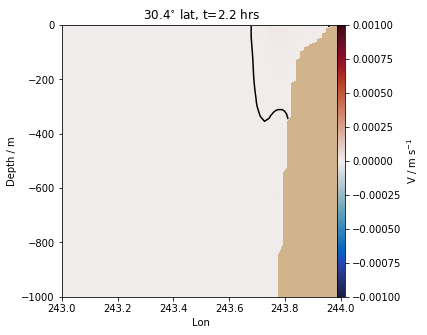

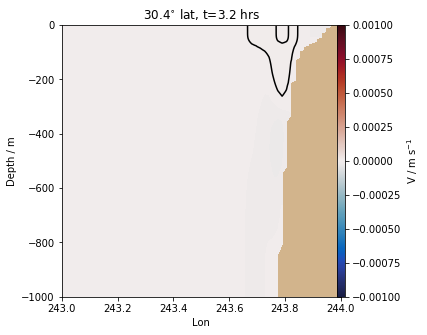

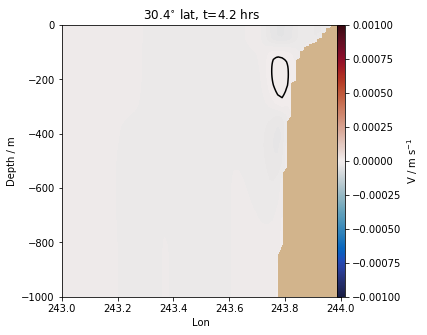

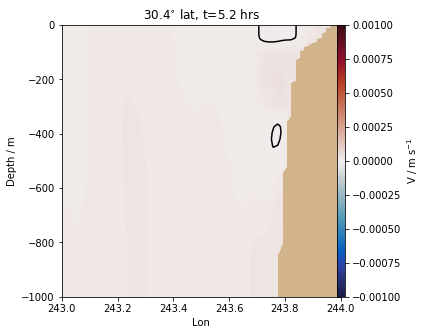

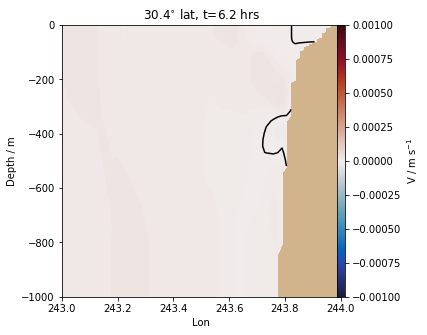

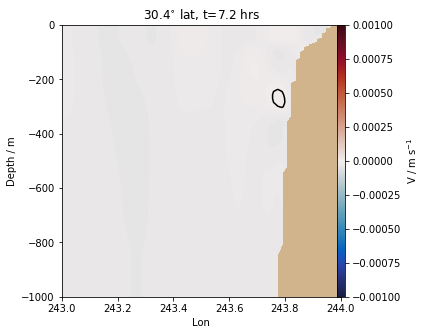

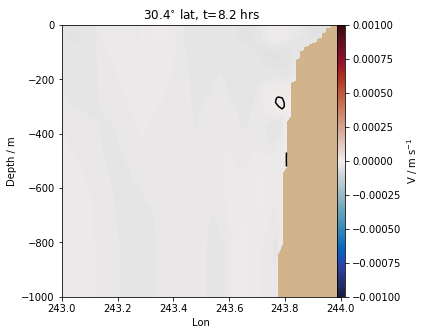

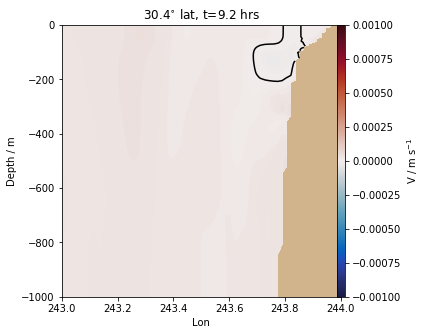

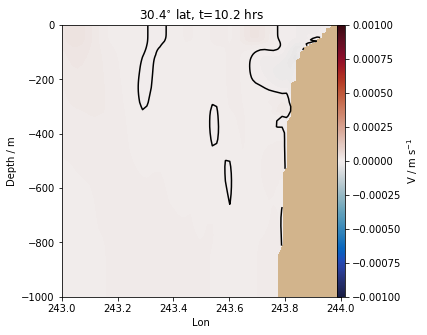

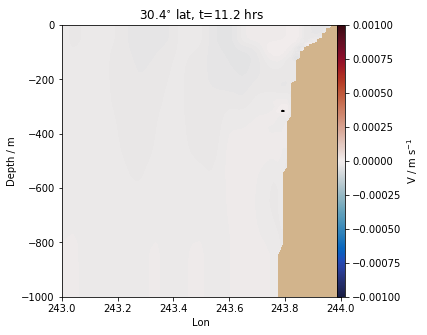

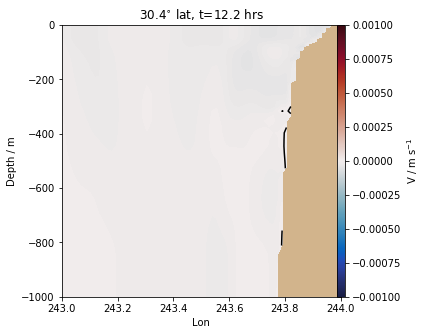

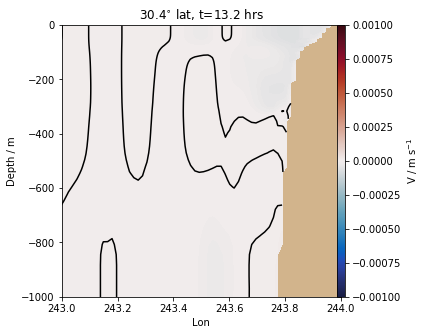

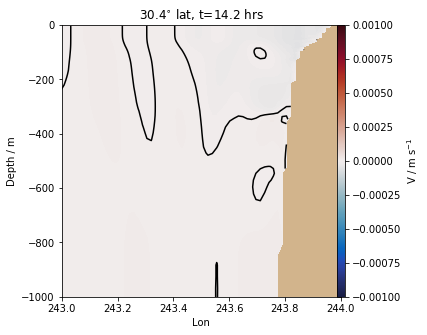

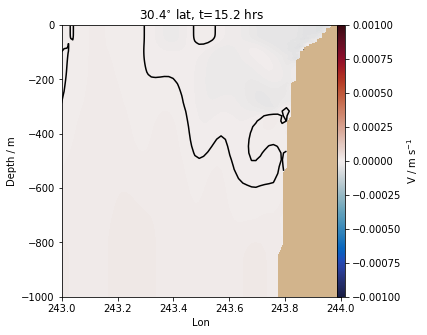

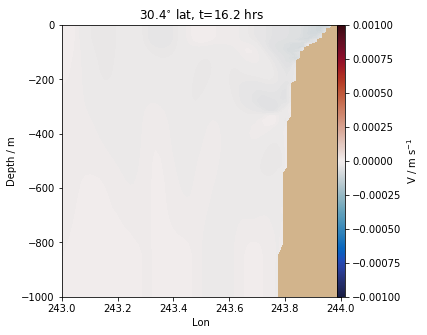

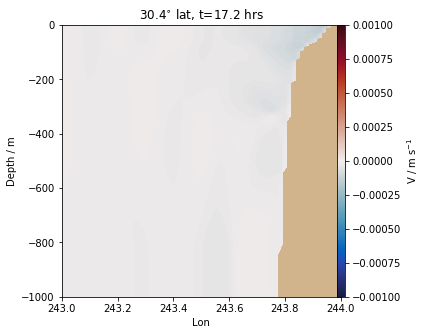

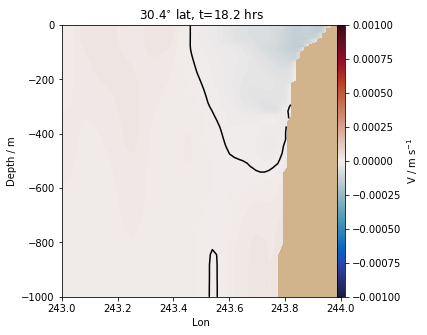

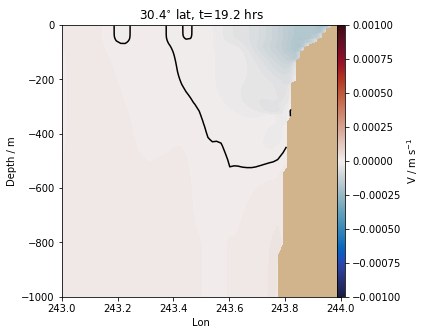

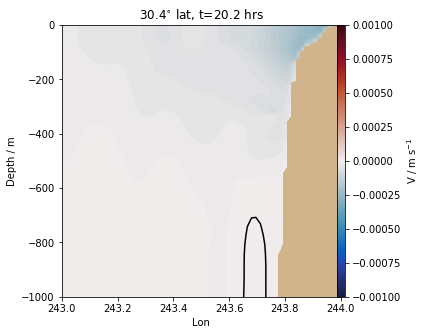

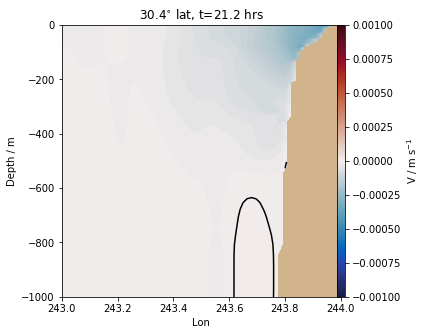

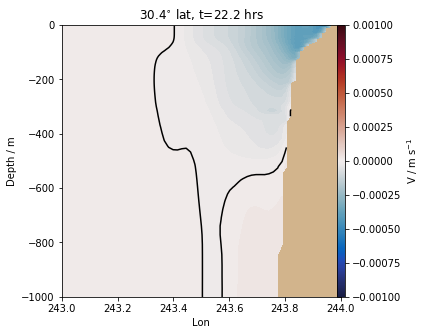

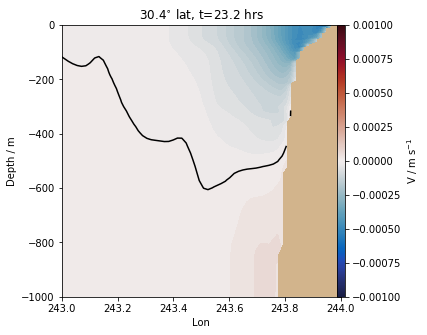

In [6]:
Tmin = -0.001
Tmax = 0.001
Tcmap = cmo.cm.balance

times = range(12,144,6)
for tt in times:
    svb.plot_zonal_CS(state_file1,lon,lat,Z[Zind],tt,lat_ind2+100,'VVEL',r'V / m s$^{-1}$',Tcmap, 
                      Tmin, Tmax, maskV,Zind=Zind, xlim1=243., xlim2=244.0)

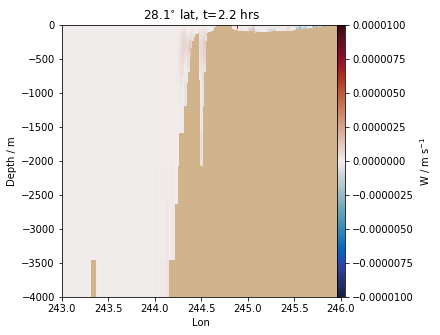

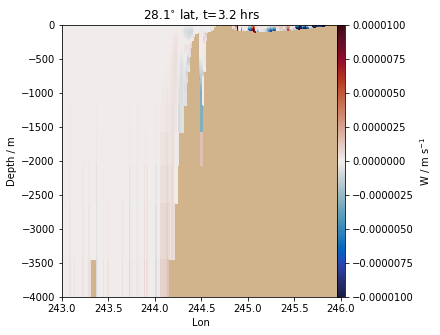

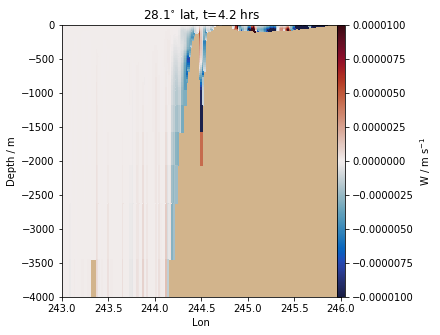

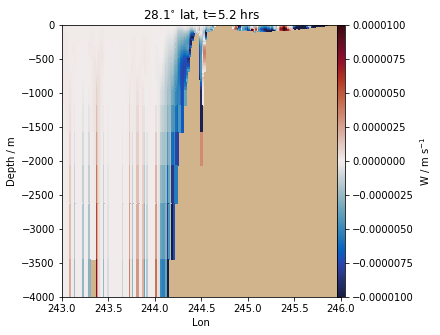

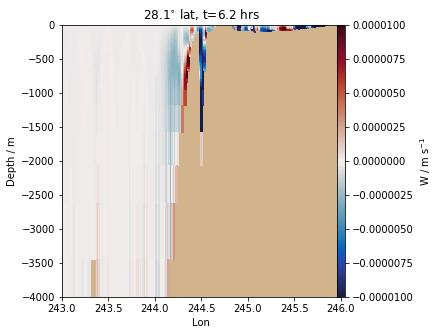

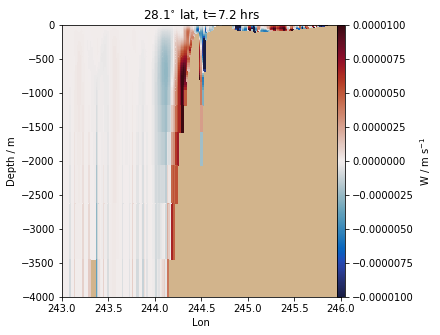

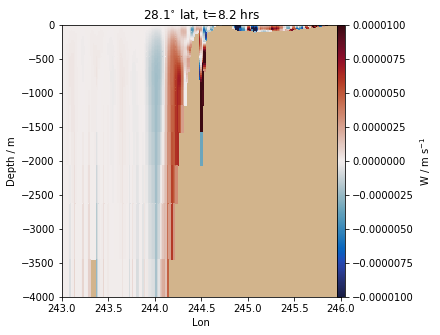

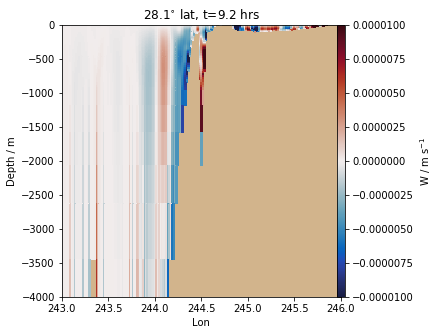

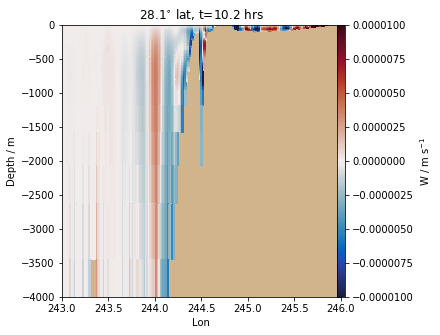

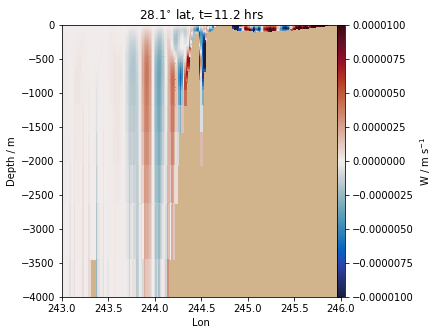

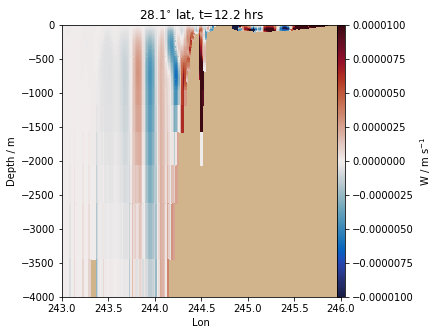

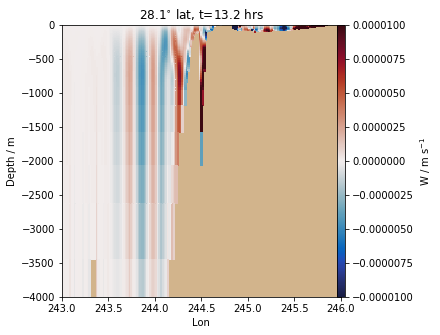

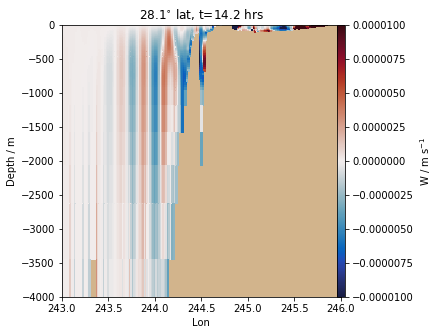

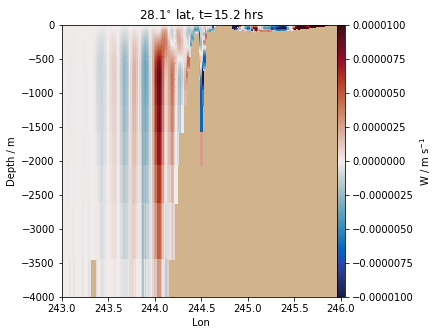

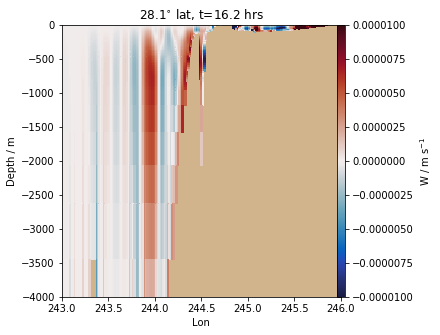

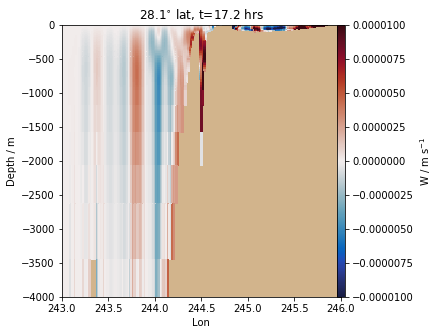

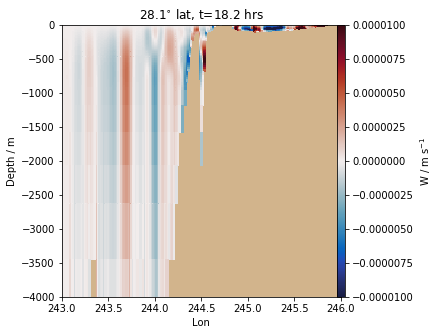

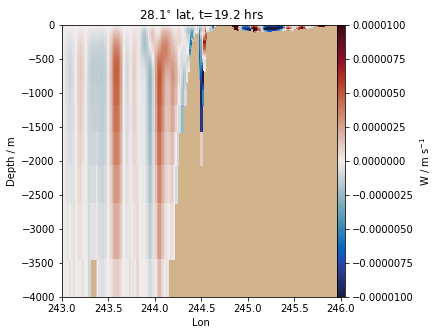

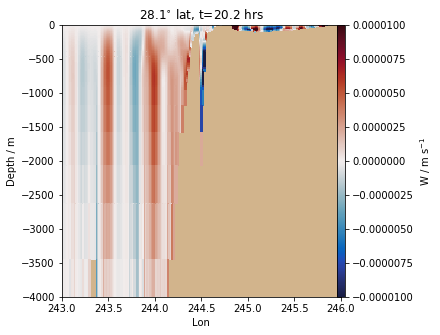

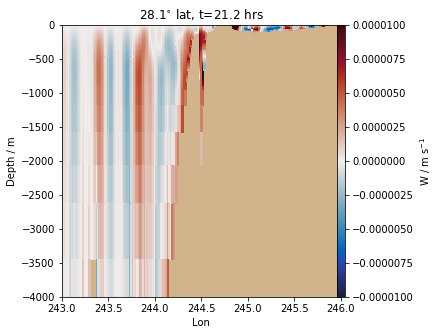

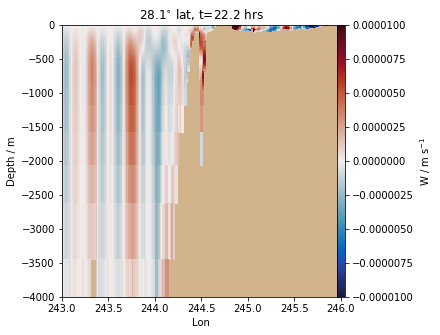

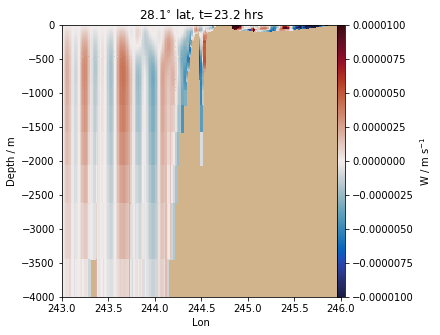

In [7]:
Tmin = -1E-5
Tmax = 1E-5
Tcmap = cmo.cm.balance

times = range(12,144,6)
for tt in times:
    ax = svb.plot_zonal_CS_pcol(state_file1,lon,lat,Z[Zind],tt,lat_ind1,'WVEL',r'W / m s$^{-1}$',Tcmap, 
                                Tmin, Tmax, maskV,Zind=Zind, xlim1=243., xlim2=246.0)
    ax.set_ylim(-4000,0)

### Hovmöller plots

Text(0.5, 0, 'lon')

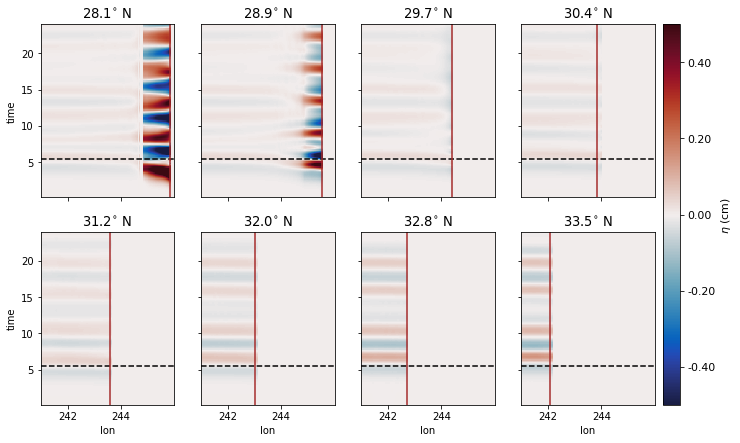

In [8]:
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4, figsize=(11,7), sharey=True,sharex=True)
plt.rcParams.update({'font.size': 11})

ax1.axhline(5.5, color='k', linestyle='--')
ax2.axhline(5.5, color='k', linestyle='--')
ax3.axhline(5.5, color='k', linestyle='--')
ax4.axhline(5.5, color='k', linestyle='--')
ax5.axhline(5.5, color='k', linestyle='--')
ax6.axhline(5.5, color='k', linestyle='--')
ax7.axhline(5.5, color='k', linestyle='--')
ax8.axhline(5.5, color='k', linestyle='--')

with Dataset(eta_file1, 'r') as nbl:
    eta1h = np.squeeze(nbl.variables['ETAN'][:,:,lat_ind1,:])
    time = nbl.variables['T'][:]
    eta2h = np.squeeze(nbl.variables['ETAN'][:,:,lat_ind2,:])
    eta3h = np.squeeze(nbl.variables['ETAN'][:,:,lat_ind2+50,:])
    eta4h = np.squeeze(nbl.variables['ETAN'][:,:,lat_ind2+100,:])
    eta5h = np.squeeze(nbl.variables['ETAN'][:,:,lat_ind2+150,:])
    eta6h = np.squeeze(nbl.variables['ETAN'][:,:,lat_ind2+200,:])
    eta7h = np.squeeze(nbl.variables['ETAN'][:,:,lat_ind2+250,:])
    eta8h = np.squeeze(nbl.variables['ETAN'][:,:,lat_ind2+300,:])

ax1.pcolormesh(lon,time/3600,(eta1h)*100,cmap=cmo.cm.balance,vmin=-0.5, vmax=0.5)
ax2.pcolormesh(lon,time/3600,(eta2h)*100,cmap=cmo.cm.balance,vmin=-0.5, vmax=0.5)
ax3.pcolormesh(lon,time/3600,(eta3h)*100,cmap=cmo.cm.balance,vmin=-0.5, vmax=0.5)
cb = ax4.pcolormesh(lon,time/3600,(eta4h)*100,cmap=cmo.cm.balance,vmin=-0.5, vmax=0.5)
ax5.pcolormesh(lon,time/3600,(eta5h)*100,cmap=cmo.cm.balance,vmin=-0.5, vmax=0.5)
ax6.pcolormesh(lon,time/3600,(eta6h)*100,cmap=cmo.cm.balance,vmin=-0.5, vmax=0.5)
ax7.pcolormesh(lon,time/3600,(eta7h)*100,cmap=cmo.cm.balance,vmin=-0.5, vmax=0.5)
ax8.pcolormesh(lon,time/3600,(eta8h)*100,cmap=cmo.cm.balance,vmin=-0.5, vmax=0.5)

norm = mpl.colors.Normalize(vmin=-0.5, vmax=0.5)
cbar_ax = fig.add_axes([0.91, 0.125, 0.022, 0.755])
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmo.cm.balance),
                  cax=cbar_ax, orientation='vertical', 
                  format='%1.2f',label='$\eta$ (cm)')

inds = [lat_ind1, lat_ind2,lat_ind2+50,lat_ind2+100,lat_ind2+150,
        lat_ind2+200,lat_ind2+250,lat_ind2+300]
axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]

for ind, ax in zip(inds, axs):
    ax.set_title(r'%1.1f$^{\circ}$ N' %lat[ind])

ax1.axvline(lon[-12], color='brown')
ax2.axvline(lon[-30], color='brown')
ax3.axvline(lon[-104], color='brown')
ax4.axvline(lon[-139], color='brown')
ax5.axvline(lon[-154], color='brown')
ax6.axvline(lon[-190], color='brown')
ax7.axvline(lon[-211], color='brown')
ax8.axvline(lon[-251], color='brown')

ax1.set_ylabel('time')
ax5.set_ylabel('time')
ax5.set_xlabel('lon')
ax6.set_xlabel('lon')
ax7.set_xlabel('lon')
ax8.set_xlabel('lon')

Text(0.5, 1.0, 'Exp04 - run03, no_slip_sides=no_slip_bottom=True')

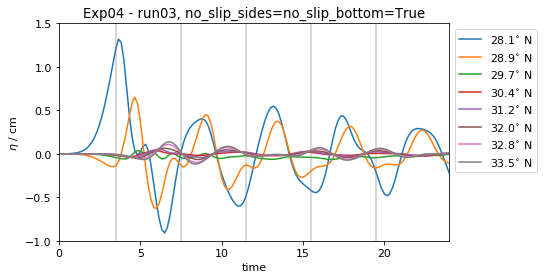

In [11]:
fig, (ax1) = plt.subplots(1,1, figsize=(7,4), sharey=True,sharex=True)

with Dataset(eta_file1, 'r') as nbl:
    eta1 = nbl.variables['ETAN'][:,:,lat_ind1,-12]
    time = nbl.variables['T'][:]
    eta2 = nbl.variables['ETAN'][:,:,lat_ind2,-30]
    eta3 = nbl.variables['ETAN'][:,:,lat_ind2+50,-104]
    eta4 = nbl.variables['ETAN'][:,:,lat_ind2+100,-139]
    eta5 = nbl.variables['ETAN'][:,:,lat_ind2+150,-154]
    eta6 = nbl.variables['ETAN'][:,:,lat_ind2+200,-190]
    eta7 = nbl.variables['ETAN'][:,:,lat_ind2+250,-211]
    eta8 = nbl.variables['ETAN'][:,:,lat_ind2+300,-251]

etas = [eta1,eta2,eta3,eta4,eta5,eta6,eta7,eta8]
for eta,ind in zip(etas, inds):
    ax1.plot(time/3600,(eta)*100, label=r'%1.1f$^{\circ}$ N' %lat[ind])


for ii in range(5):
    ax1.axvline(3.5+(4.*ii), color='0.5', alpha=0.4)
ax1.set_ylabel('$\eta$ / cm')
ax1.set_xlabel('time')
ax1.set_xlim(0,24)
ax1.set_ylim(-1,1.5)
ax1.legend(bbox_to_anchor=(1,1))
ax1.set_title('Exp04 - run03, no_slip_sides=no_slip_bottom=True')

3.6666666666666665 0.01318626605647896
4.666666666666667 0.006509640942952035
4.833333333333333 0.0003758543876942652
6.0 0.00036357590896023704
6.166666666666667 0.0005063360518811064
6.5 0.0006400933386214142
6.666666666666667 0.0010853731002514362
6.833333333333333 0.0013866132668926413


Text(0.5, 1.0, 'Exp04 - run03, no_slip_bottom=True')

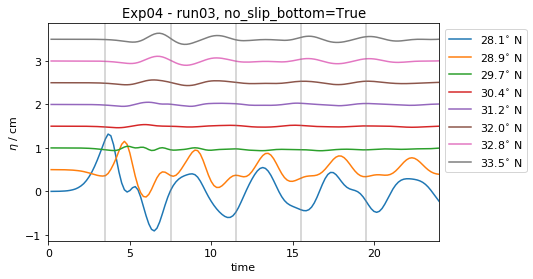

In [12]:
fig, (ax1) = plt.subplots(1,1, figsize=(7,4), sharey=True,sharex=True)

etas = [eta1,eta2,eta3,eta4,eta5,eta6,eta7,eta8]
for eta,ind, off in zip(etas, inds, range(len(etas))):
    ax1.plot(time/3600,(0.5*off)+(eta)*100, label=r'%1.1f$^{\circ}$ N' %lat[ind])
    print(time[np.argmax(eta)]/3600,np.nanmax(eta))

for ii in range(5):
    ax1.axvline(3.5+(4.*ii), color='0.5', alpha=0.4)
ax1.set_ylabel('$\eta$ / cm')
ax1.set_xlabel('time')
ax1.set_xlim(0,24)
ax1.legend(bbox_to_anchor=(1,1))
ax1.set_title('Exp04 - run03, no_slip_bottom=True')